In [1]:
# Author: Mitchell D. Lobbes

# Standard imports
import pandas as pd
import numpy as np

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set Viewing Options
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 105)

In [3]:
data = pd.read_csv("../../Data/Model/Model_data.csv")
data

,rental_price,GLA,n_res_benefits,population,d_school,d_transfer,d_mainstreet,n_business,n_earners,d_supermarket,avg_income,%_single_family_homes,k20_high_income,households_with_children,single_households,household_size,k40_low_income,WOZ,n_owner_occupied,urbanity_score,supermarket_1km,k0_k15,k15_k25,k25_k45,k45_k65,k65+
0,145.000000,800.0,960.0,5710,0.3,1.8,1.6,965.0,4500.0,0.4,26.9,22.0,15.5,245,3385,1.3,51.8,253.0,24.0,1.0,8.3,255,2155,1830,840,620
1,113.000000,1000.0,390.0,2160,0.2,1.0,0.6,220.0,1700.0,0.4,26.5,2.0,16.2,165,1050,1.4,43.0,229.0,33.0,1.0,3.0,155,525,940,345,190
2,145.428980,1049.0,640.0,5975,0.3,2.9,1.2,550.0,5000.0,0.5,24.9,14.0,15.6,385,2855,1.4,50.7,226.0,30.0,1.0,4.7,455,2275,2110,745,380
3,195.647807,2280.0,640.0,5975,0.3,2.9,1.2,550.0,5000.0,0.5,24.9,14.0,15.6,385,2855,1.4,50.7,226.0,30.0,1.0,4.7,455,2275,2110,745,380
4,105.000000,1400.0,0.0,650,NaN,NaN,NaN,200.0,NaN,0.4,NaN,0.0,NaN,70,175,1.8,NaN,321.0,47.0,2.0,NaN,70,60,265,165,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,127.000000,1400.0,0.0,4410,NaN,NaN,NaN,395.0,NaN,0.6,NaN,66.0,NaN,820,435,2.6,NaN,334.0,66.0,3.0,NaN,1095,425,1395,1025,465
299,120.000000,833.0,780.0,3000,0.9,16.3,0.8,210.0,2400.0,0.4,25.9,95.0,15.2,485,400,2.2,38.9,239.0,71.0,4.0,1.0,510,315,740,820,620
300,170.000000,2045.0,1280.0,7095,0.7,16.2,1.6,550.0,5600.0,0.8,29.6,77.0,22.4,1215,860,2.4,33.2,299.0,72.0,3.0,0.8,1295,795,1965,2185,860
301,123.000000,1674.0,0.0,1875,NaN,NaN,NaN,270.0,NaN,0.5,NaN,43.0,NaN,150,560,1.7,NaN,238.0,47.0,3.0,NaN,150,170,435,445,685


In [4]:
missing = pd.DataFrame(index=data.columns, columns=["Missing %", "Missing #"])
missing["Missing %"] = data.isnull().sum() / len(data) * 100
missing["Missing #"] = data.isnull().sum()
missing.sort_values(by="Missing %", ascending=False).head(50)

,Missing %,Missing #
avg_income,7.260726,22
k40_low_income,3.960396,12
k20_high_income,3.960396,12
supermarket_1km,3.300330,10
d_school,3.300330,10
d_transfer,3.300330,10
d_mainstreet,3.300330,10
n_earners,2.970297,9
WOZ,0.990099,3
%_single_family_homes,0.660066,2


In [5]:
missing2 = pd.DataFrame(index=data.index, columns=["Missing %", "Missing #"])
missing2["Missing %"] = data.isnull().sum(axis=1)/len(data.columns) * 100
missing2["Missing #"] = data.isnull().sum(axis=1)


# convert index number to "Store + index number"
missing2.index = "Store " + missing2.index.astype(str)
missing2.sort_values(by="Missing %", ascending=False).head(50)

,Missing %,Missing #
Store 174,42.307692,11
Store 293,30.769231,8
Store 298,30.769231,8
Store 181,30.769231,8
Store 296,30.769231,8
Store 297,30.769231,8
Store 180,30.769231,8
Store 301,30.769231,8
Store 4,30.769231,8
Store 5,30.769231,8


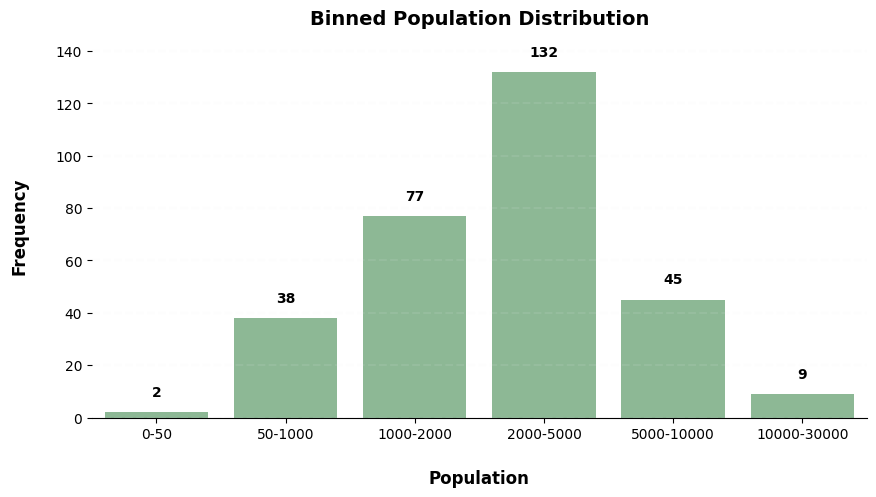

In [6]:
from matplotlib.ticker import StrMethodFormatter

subset_data = data["population"]

# Bin the subset_data into the following bins (0-100) (100-500) (500-1000) (1000-5000) (5000-7500) (7500-10000) (10000-30000)
bins = [0, 50, 1000, 2000, 5000, 10000, 30000]
labels = ["0-50", "50-1000", "1000-2000", "2000-5000", "5000-10000", "10000-30000"]

# Bin the data
binned_data = pd.cut(subset_data, bins=bins, labels=labels, include_lowest=True)
binned_data

# Add the binned data to the dataframe
data["population_binned"] = binned_data

subset_data = data[["population","population_binned"]]
subset_data

plt.figure(figsize=(10, 5))

# Plot the data
ax = sns.countplot(x="population_binned", data=subset_data, color = '#86bf91')

# Remove title
ax.set_title("Binned Population Distribution", weight='bold', size=14)

# Set x-axis label
ax.set_xlabel("Population", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# despine removes the top and right and left spines from plot
sns.despine()

# sns.set(rc={'figure.figsize':(12,8)})

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

#set background to white
ax.set_facecolor('white')

# set bottom spin to black thin line
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(0.8)


# Draw horizontal axis lines behind bars
vals = ax.get_yticks()
for tick in vals:
        
        ax.axhline(y=tick, linestyle='dashed', alpha=0.1, color='#eeeeee', zorder=1)

# Add annotation to bars (number of observations)
rects = ax.patches
labels = [2, 38, 77, 132, 45, 9]
for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', color='black', weight='bold')

# drop databnned column
data.drop(columns=["population_binned"], inplace=True)


In [7]:
feature_description = data.describe().T
feature_description = feature_description[['mean', 'std', 'min', 'max']]

# Sort by mean
# feature_description.sort_values(by='mean', inplace=True, ascending=False)

# Sort by name 
feature_description.sort_index(inplace=True)

# change all floats to 2 decimals
feature_description = feature_description.round(2)

feature_description

,mean,std,min,max
%_single_family_homes,49.09,30.45,0.0,96.0
GLA,1484.34,645.22,150.0,4533.0
WOZ,292.77,107.22,121.0,883.0
avg_income,28.45,6.25,16.1,61.4
d_mainstreet,1.65,0.87,0.3,5.6
d_school,0.53,0.26,0.1,2.4
d_supermarket,0.48,0.22,0.1,2.2
d_transfer,9.98,8.37,0.3,52.5
household_size,1.96,0.34,1.3,3.1
households_with_children,454.49,497.01,0.0,4560.0


In [8]:
data = data.drop(174)
data = data.drop(207)
data = data.reset_index(drop=True)

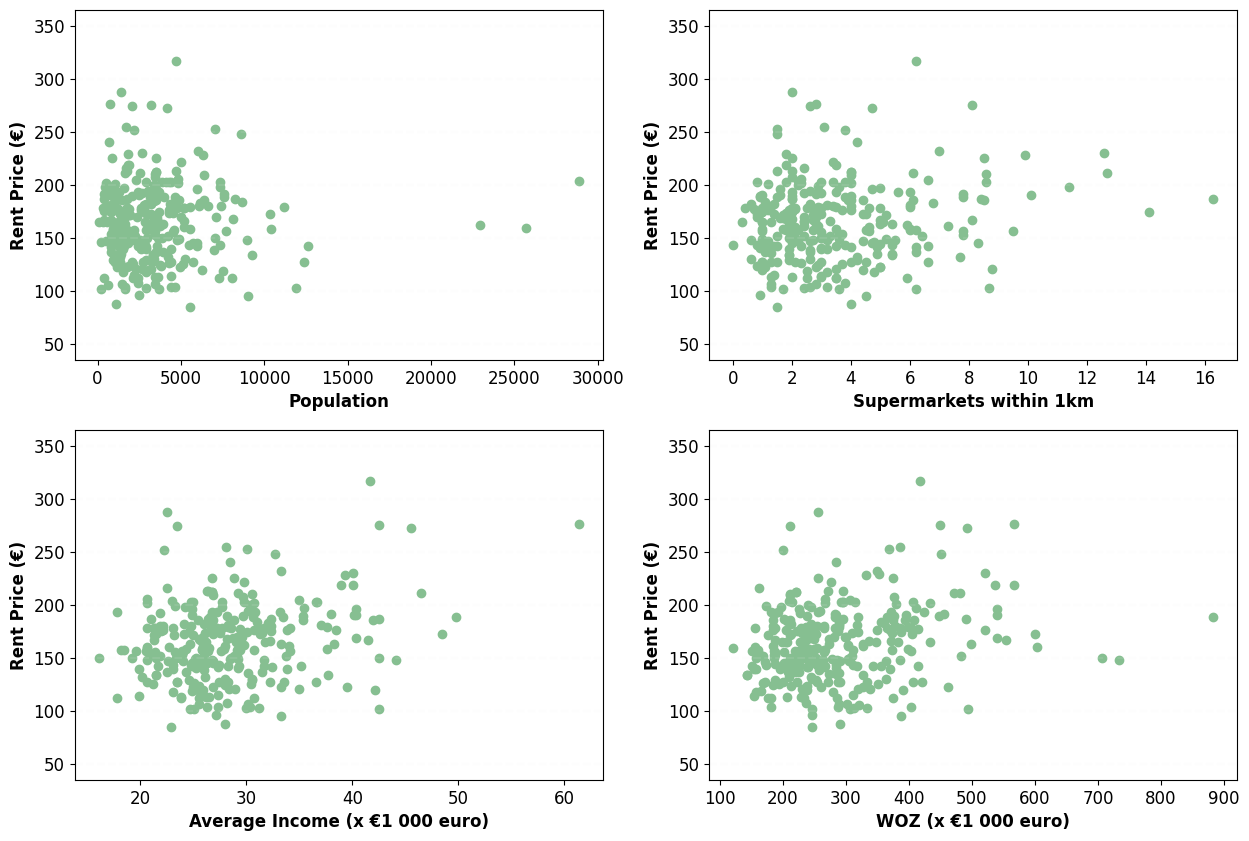

In [9]:
# plot a figure with 4 subplots about scatterplots between the "rent_price" and ["population", "d_supermarket", "avg_icnome", "WOZ"]
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# plot a scatterplot between the "rent_price" and "population"
axs[0, 0].scatter(data["population"], data["rental_price"], color='#86bf91')
axs[0, 0].set_xlabel('Population', weight='bold', size=12)
axs[0, 0].tick_params(axis='x', labelsize=12)
axs[0, 0].tick_params(axis='y', labelsize=12)
axs[0, 0].set_ylabel('Rent Price (€)', weight='bold', size=12)
axs[0, 0].set_facecolor('white')
# axs[0, 0].spines['right'].set_visible(True)
# axs[0, 0].spines['top'].set_visible(True)
# axs[0, 0].spines['left'].set_visible(True)
# axs[0, 0].spines['bottom'].set_visible(True)
# axs[0, 0].spines['bottom'].set_color('black')
# axs[0, 0].spines['bottom'].set_linewidth(0.8)

#axs[0, 0].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# plot a scatterplot between the "rent_price" and "d_supermarket"
axs[0, 1].scatter(data["supermarket_1km"], data["rental_price"], color='#86bf91')
axs[0, 1].set_xlabel('Supermarkets within 1km', weight='bold', size=12)
axs[0, 1].tick_params(axis='x', labelsize=12)
axs[0, 1].tick_params(axis='y', labelsize=12)
axs[0, 1].set_ylabel('Rent Price (€)', weight='bold', size=12)
axs[0, 1].set_facecolor('white')
# axs[0, 1].spines['right'].set_visible(True)
# axs[0, 1].spines['top'].set_visible(True)
# axs[0, 1].spines['left'].set_visible(True)
# axs[0, 1].spines['bottom'].set_visible(True)
# axs[0, 1].spines['bottom'].set_color('black')
# axs[0, 1].spines['bottom'].set_linewidth(0.8)
#axs[0, 1].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# plot a scatterplot between the "rent_price" and "avg_income"
axs[1, 0].scatter(data["avg_income"], data["rental_price"], color='#86bf91')
axs[1, 0].set_xlabel('Average Income (x €1 000 euro)', weight='bold', size=12)
axs[1, 0].tick_params(axis='x', labelsize=12)
axs[1, 0].tick_params(axis='y', labelsize=12)
axs[1, 0].set_ylabel('Rent Price (€)', weight='bold', size=12)
axs[1, 0].set_facecolor('white')
# axs[1, 0].spines['right'].set_visible(True)
# axs[1, 0].spines['top'].set_visible(True)
# axs[1, 0].spines['left'].set_visible(True)
# axs[1, 0].spines['bottom'].set_visible(True)
# axs[1, 0].spines['bottom'].set_color('black')
# axs[1, 0].spines['bottom'].set_linewidth(0.8)
#axs[1, 0].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# plot a scatterplot between the "rent_price" and "WOZ"
axs[1, 1].scatter(data["WOZ"], data["rental_price"], color='#86bf91')
axs[1, 1].set_xlabel('WOZ (x €1 000 euro)', weight='bold', size=12)
axs[1, 1].tick_params(axis='x', labelsize=12)
axs[1, 1].tick_params(axis='y', labelsize=12)
axs[1, 1].set_ylabel('Rent Price (€)', weight='bold', size=12)
axs[1, 1].set_facecolor('white')
# axs[1, 1].spines['right'].set_visible(True)
# axs[1, 1].spines['top'].set_visible(True)
# axs[1, 1].spines['left'].set_visible(True)
# axs[1, 1].spines['bottom'].set_visible(True)
# axs[1, 1].spines['bottom'].set_color('black')
# axs[1, 1].spines['bottom'].set_linewidth(0.8)
#axs[1, 1].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Despine
# sns.despine()

# Draw horizontal axis lines behind bars
vals = axs[0, 0].get_yticks()
for tick in vals:
            
            axs[0, 0].axhline(y=tick, linestyle='dashed', alpha=0.1, color='#eeeeee', zorder=1)

# Draw horizontal axis lines behind bars
vals = axs[0, 1].get_yticks()
for tick in vals:
        
        axs[0, 1].axhline(y=tick, linestyle='dashed', alpha=0.1, color='#eeeeee', zorder=1)

# Draw horizontal axis lines behind bars
vals = axs[1, 0].get_yticks()
for tick in vals:
        
        axs[1, 0].axhline(y=tick, linestyle='dashed', alpha=0.1, color='#eeeeee', zorder=1)

# Draw horizontal axis lines behind bars
vals = axs[1, 1].get_yticks()
for tick in vals:
        
        axs[1, 1].axhline(y=tick, linestyle='dashed', alpha=0.1, color='#eeeeee', zorder=1)





# show plot
plt.show()

In [10]:
# corelation matrix
X = data.drop(columns=["rental_price"], axis=1).copy()
y = data["rental_price"].copy()

corr = X.corr()
corr

,GLA,n_res_benefits,population,d_school,d_transfer,d_mainstreet,n_business,n_earners,d_supermarket,avg_income,%_single_family_homes,k20_high_income,households_with_children,single_households,household_size,k40_low_income,WOZ,n_owner_occupied,urbanity_score,supermarket_1km,k0_k15,k15_k25,k25_k45,k45_k65,k65+
GLA,1.000000,0.043416,-0.008530,0.069360,0.062412,-0.039547,-0.118919,-0.005452,0.100510,-0.110472,0.074773,-0.045733,0.049086,-0.093675,0.123919,0.015931,-0.047648,0.014921,0.020995,-0.210770,0.048013,-0.072112,-0.062703,0.005715,0.046072
n_res_benefits,0.043416,1.000000,0.924921,0.026260,-0.022084,0.025107,0.615052,0.936550,0.175813,-0.113375,-0.016128,-0.118410,0.894936,0.774969,-0.016389,0.163588,-0.131886,-0.118806,-0.106903,-0.031935,0.867775,0.709180,0.786664,0.914223,0.967825
population,-0.008530,0.924921,1.000000,-0.042703,-0.121963,0.106500,0.763275,0.996987,0.209705,-0.007640,-0.045320,0.036652,0.961768,0.869812,0.044539,0.053552,-0.023495,-0.109277,-0.186995,0.040531,0.947746,0.868470,0.939571,0.977813,0.875074
d_school,0.069360,0.026260,-0.042703,1.000000,0.234645,-0.067004,-0.109961,-0.046856,0.309908,-0.140665,0.199190,-0.157761,-0.026160,-0.097745,0.103035,0.123806,-0.069664,0.106601,0.335166,-0.270051,-0.034398,-0.064672,-0.108955,-0.028056,0.047631
d_transfer,0.062412,-0.022084,-0.121963,0.234645,1.000000,-0.254685,-0.257448,-0.124037,0.164879,-0.260449,0.333734,-0.266964,-0.059191,-0.255972,0.171148,0.206375,-0.225817,0.172955,0.458451,-0.299264,-0.071297,-0.215803,-0.231013,-0.074110,0.027360
d_mainstreet,-0.039547,0.025107,0.106500,-0.067004,-0.254685,1.000000,0.255914,0.096916,-0.035535,0.058941,-0.246153,0.042327,0.062871,0.191460,-0.209772,-0.026755,0.013498,-0.198036,-0.257762,0.282035,0.063629,0.134387,0.183554,0.083917,0.009231
n_business,-0.118919,0.615052,0.763275,-0.109961,-0.257448,0.255914,1.000000,0.762552,0.059603,0.333033,-0.312905,0.276970,0.631478,0.833904,-0.199845,-0.151175,0.219774,-0.203314,-0.330044,0.387154,0.624700,0.730356,0.841293,0.716215,0.571494
n_earners,-0.005452,0.936550,0.996987,-0.046856,-0.124037,0.096916,0.762552,1.000000,0.207444,-0.008543,-0.056929,0.025485,0.953410,0.874989,0.020640,0.056465,-0.034992,-0.117107,-0.189030,0.049600,0.935914,0.864462,0.934291,0.975897,0.884778
d_supermarket,0.100510,0.175813,0.209705,0.309908,0.164879,-0.035535,0.059603,0.207444,1.000000,0.040316,0.485111,0.164878,0.265913,0.022292,0.446018,-0.081053,0.083431,0.332123,0.381063,-0.414559,0.250344,0.169559,0.101758,0.269422,0.206179
avg_income,-0.110472,-0.113375,-0.007640,-0.140665,-0.260449,0.058941,0.333033,-0.008543,0.040316,1.000000,-0.102883,0.912832,-0.056782,0.023915,0.021658,-0.833915,0.837683,0.291303,-0.063246,0.172410,-0.061630,-0.028564,0.037992,0.010401,-0.032027


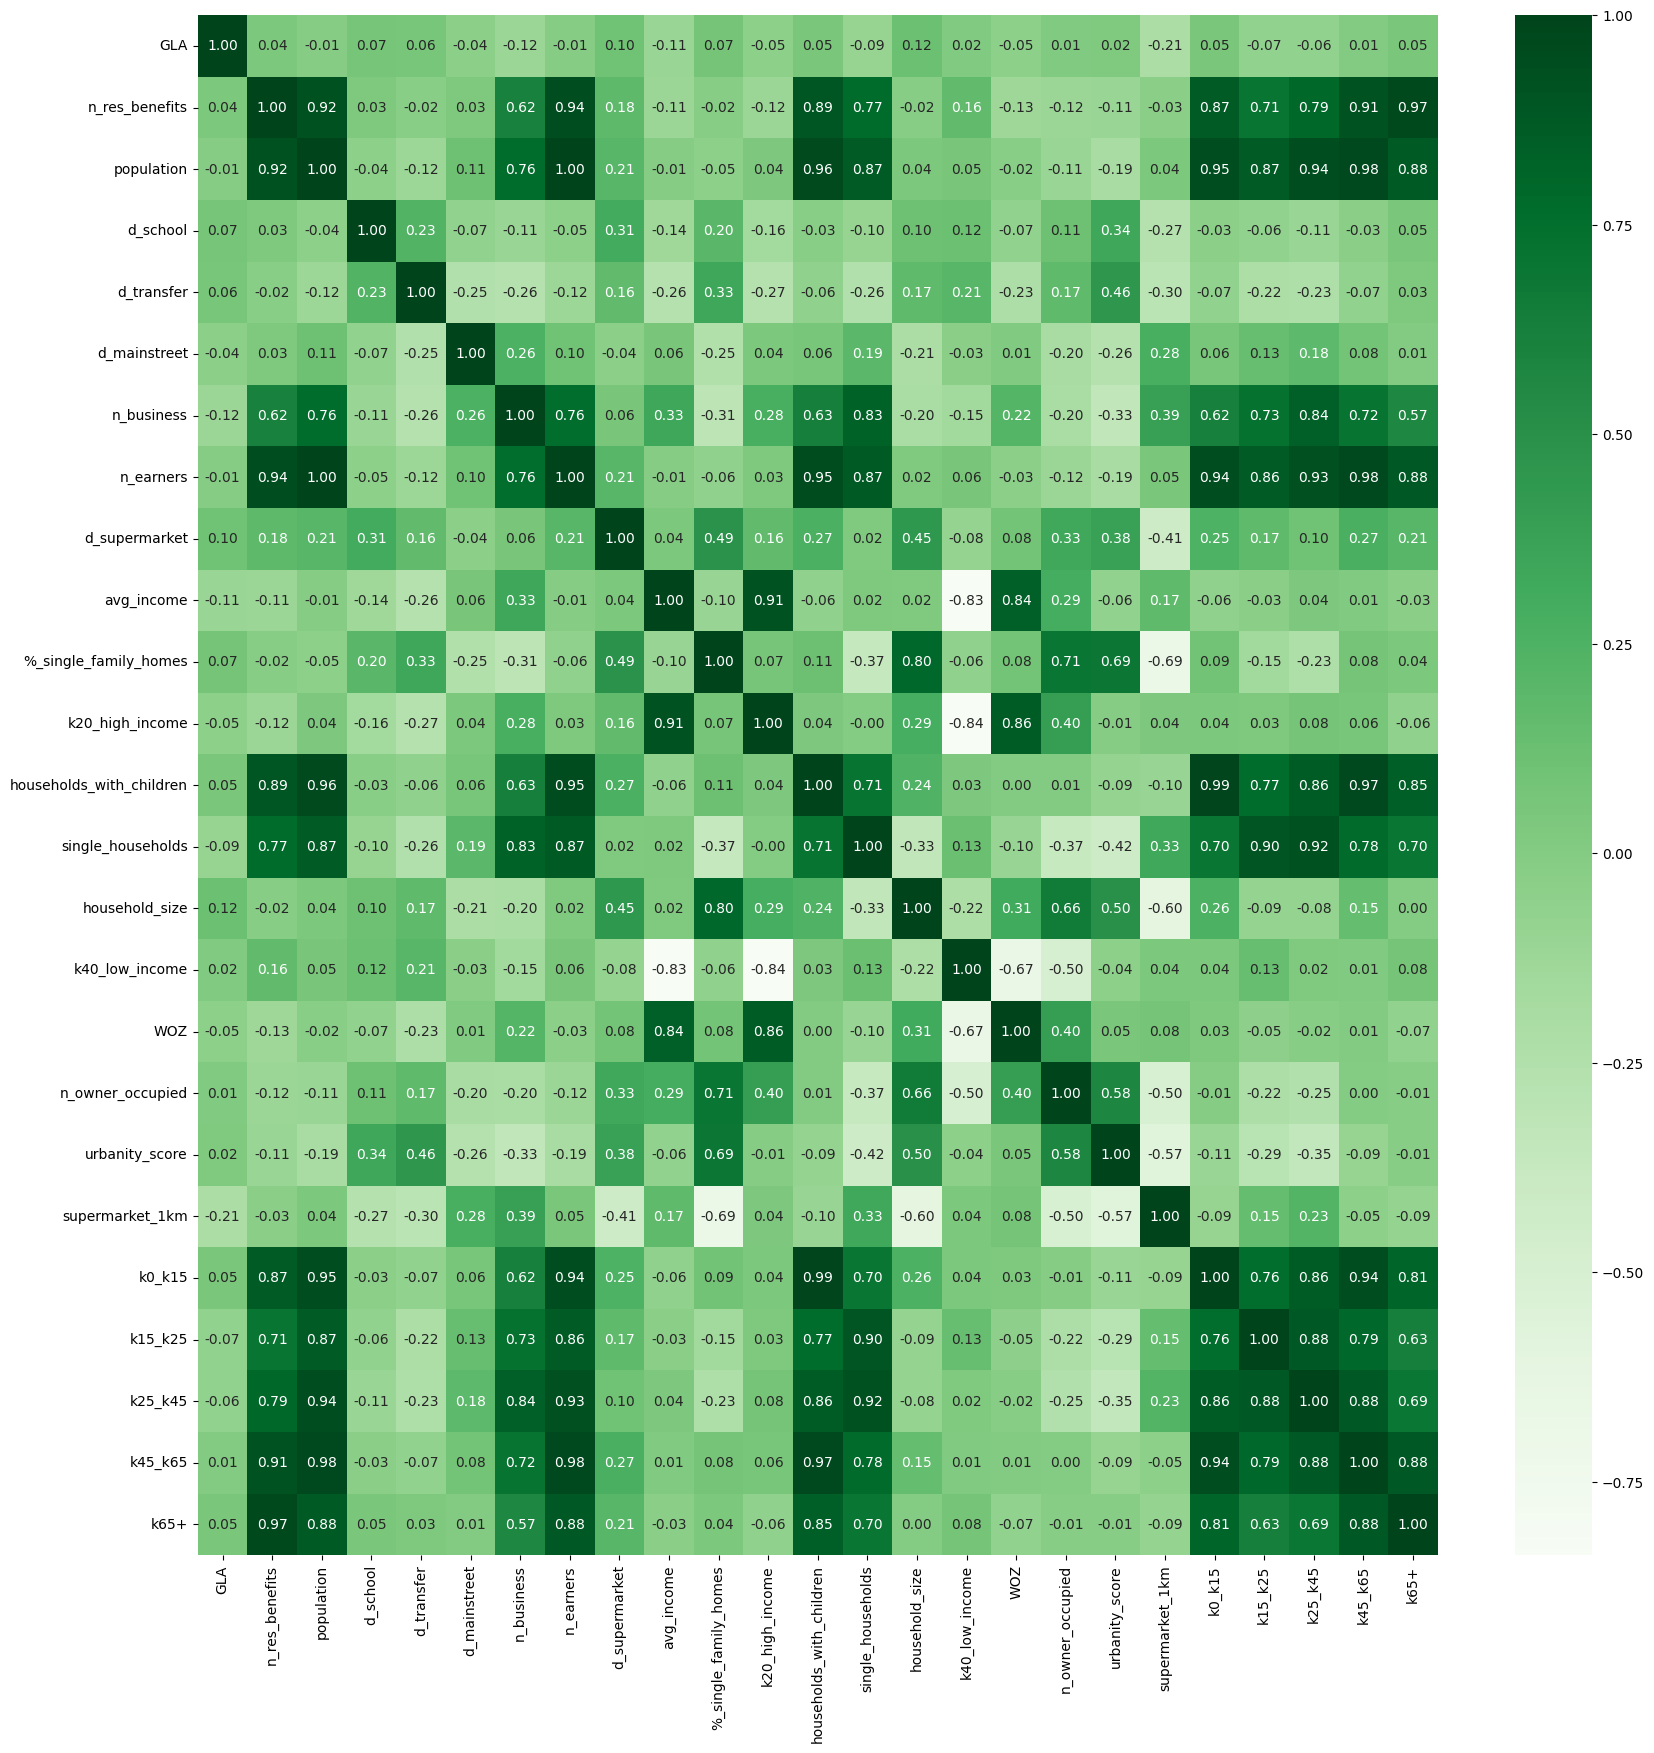

In [11]:
# visualize correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Greens")
plt.show()

In [12]:
data

,rental_price,GLA,n_res_benefits,population,d_school,d_transfer,d_mainstreet,n_business,n_earners,d_supermarket,avg_income,%_single_family_homes,k20_high_income,households_with_children,single_households,household_size,k40_low_income,WOZ,n_owner_occupied,urbanity_score,supermarket_1km,k0_k15,k15_k25,k25_k45,k45_k65,k65+
0,145.000000,800.0,960.0,5710,0.3,1.8,1.6,965.0,4500.0,0.4,26.9,22.0,15.5,245,3385,1.3,51.8,253.0,24.0,1.0,8.3,255,2155,1830,840,620
1,113.000000,1000.0,390.0,2160,0.2,1.0,0.6,220.0,1700.0,0.4,26.5,2.0,16.2,165,1050,1.4,43.0,229.0,33.0,1.0,3.0,155,525,940,345,190
2,145.428980,1049.0,640.0,5975,0.3,2.9,1.2,550.0,5000.0,0.5,24.9,14.0,15.6,385,2855,1.4,50.7,226.0,30.0,1.0,4.7,455,2275,2110,745,380
3,195.647807,2280.0,640.0,5975,0.3,2.9,1.2,550.0,5000.0,0.5,24.9,14.0,15.6,385,2855,1.4,50.7,226.0,30.0,1.0,4.7,455,2275,2110,745,380
4,105.000000,1400.0,0.0,650,NaN,NaN,NaN,200.0,NaN,0.4,NaN,0.0,NaN,70,175,1.8,NaN,321.0,47.0,2.0,NaN,70,60,265,165,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,127.000000,1400.0,0.0,4410,NaN,NaN,NaN,395.0,NaN,0.6,NaN,66.0,NaN,820,435,2.6,NaN,334.0,66.0,3.0,NaN,1095,425,1395,1025,465
297,120.000000,833.0,780.0,3000,0.9,16.3,0.8,210.0,2400.0,0.4,25.9,95.0,15.2,485,400,2.2,38.9,239.0,71.0,4.0,1.0,510,315,740,820,620
298,170.000000,2045.0,1280.0,7095,0.7,16.2,1.6,550.0,5600.0,0.8,29.6,77.0,22.4,1215,860,2.4,33.2,299.0,72.0,3.0,0.8,1295,795,1965,2185,860
299,123.000000,1674.0,0.0,1875,NaN,NaN,NaN,270.0,NaN,0.5,NaN,43.0,NaN,150,560,1.7,NaN,238.0,47.0,3.0,NaN,150,170,435,445,685


In [13]:
data.to_csv("../../Data/Model/Model_data_cleaned.csv", index=False)
